# Load Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_circles
X, y = make_blobs(
n_samples=100,
n_features=4,
centers=2,
random_state=1,
cluster_std=0.6
)
print("X[0]:", X[0])
print("y[0]:", y[0])

X[0]: [-7.31186568 -7.38611125 -6.54013334 -2.89466905]
y[0]: 1


In [2]:
# spliting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 4), (20, 4), (80,), (20,))

## Visualize the data

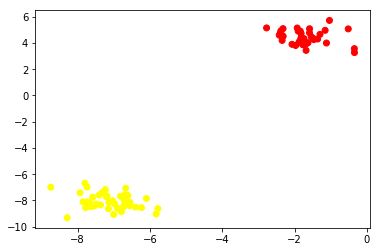

In [4]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='autumn')

# Using ADALINE from sklearn
**Unfortunately, there is no ADALINE in scikit-learn.** Yet, ADALINE is simply just a special case of artificial neural network with only 1 input layer and 1 output layer. As an altenative, we simply consider **a multi-layer perceptron (MLP) with no hidden layer** to be the ADALINE (even thought they are not exactly the same.)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(
    hidden_layer_sizes=(), # empty tuple -> no hidden layer used.
    activation='identity', # This doesn't matter b/c there are no hidden layers
    solver='sgd', # stochastic gradient descent
    alpha=0.1, # l2 penalty on weights
    learning_rate_init=1,
    learning_rate='constant',
    max_iter=200
)
clf.fit(X_train, y_train)

MLPClassifier(activation='identity', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(), learning_rate='constant',
       learning_rate_init=1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
y_pred_train = clf.predict(X_train)
print(y_pred_train)
accuracy_score(y_train, y_pred_train)

[1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 0]


1.0

In [14]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)
print(clf.coefs_, clf.intercepts_)

[array([[-20.92048165],
       [-46.05125496],
       [ 11.66230557],
       [  2.21431725]])] [array([-0.20600135])]


## Practice!
Try playing around with different learning rates(learning_rate_init), l2 penalty(alpha), and number of epochs to run for(max_iter). How do they effect the model?

# DIY: Build your own ADALINE with stochastic gradient descent

In [8]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate
    n_iter : int
        Number of iteration passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle

            
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
            
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights for a single sample."""
        output = self.activation(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0] 

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, 0)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # initialize the weight
        self._initialize_weights(X.shape[1])
        
        # make a copy of y: y_
        y_ = np.copy(y) # e.g. it is np.array([1,1,0,1,0,0,1])
        
        #convert the value of 0 to -1 in y_
        y_[y_==0] = -1 # e.g. it is now np.array([1,1,-1,1,-1,-1,1])
        
        for i in range(self.n_iter):
            # shuffle the data if required
            if self.shuffle:
                X, y_ = self._shuffle(X, y_)
            
            # update the weight sample by sample
            for xi, target in zip(X, y_):
                self._update_weights(xi, target)
            
        return self

In [9]:
clf = AdalineSGD()
clf.fit(X_train, y_train)

In [10]:
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [11]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

1.0

In [12]:
# the weights found by SGD
clf.w_

array([-0.03663281, -0.06497873, -0.10875282,  0.06709167, -0.01311173])

## What if the data is nonlinear?

In [13]:
X, y = make_circles(
n_samples=100,
noise=0.1,
factor=0.2,
random_state=1
)
print(X.shape, y.shape)

(100, 2) (100,)


### Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


## Visualize data

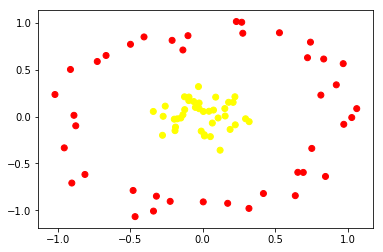

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='autumn')

## Practice!
1) Try out our Adaline model to the nonlinear data

2) does it work? Why/Why not?

In [16]:
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.5625

## Activation Functions
Now let's try adding nonlinearities. Below are a few options we will look at today.

1) Tanh

![](https://i2.wp.com/sefiks.com/wp-content/uploads/2017/01/tanh.png?resize=456%2C300&ssl=1)

2) Sigmoid

![](https://cdn-images-1.medium.com/max/1600/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

3) ReLu

![](https://cdn-images-1.medium.com/max/357/1*oePAhrm74RNnNEolprmTaQ.png)


## Add a hidden Layer!

In [17]:
clf = MLPClassifier(
    hidden_layer_sizes=(16, 16), # empty tuple -> no hidden layer used.
    activation='relu', # This doesn't matter b/c there are no hidden layers
    solver='sgd', # stochastic gradient descent
    alpha=0.0001, # l2 penalty on weights
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=20000
)
clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 16), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [19]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

1.0

## Question!
What would happen if we set our activation function to the identity function? 

## Practice
1) Try out the other activation functions: relu, tanh, and logistic(sigmoid)

2) Try tweaking other hyperparameters to see how it effects the model. 

For more info checkout the [docs](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)